<a href="https://colab.research.google.com/github/SharoonSharif/Weather_Forecasting_ML_RIDGE/blob/main/Weather_Forecasting_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
upload = files.upload()


Saving weather-forecast-data.csv to weather-forecast-data.csv


In [5]:
import pandas as pd
weather =pd.read_csv("weather-forecast-data.csv", index_col="DATE")
weather.apply(pd.isnull).sum()/weather.shape[0]




,0
STATION,0.000000
NAME,0.000000
AWND,0.903743
DAPR,0.996994
MDPR,0.997002
PGTM,0.997071
PRCP,0.136273
SNOW,0.573886
SNWD,0.975845
TAVG,0.809275


In [9]:
core_weather = weather[["PRCP","SNOW","SNWD","TMAX","TMIN"]].copy()
core_weather.columns = ["precip","snow","snow_depth","temp_max","temp_min"]
core_weather.apply(pd.isnull).sum()


,0
precip,15774
snow,66429
snow_depth,112957
temp_max,74548
temp_min,74586


In [12]:
core_weather["snow"].value_counts()
del core_weather["snow"]
core_weather["snow_depth"].value_counts()
del core_weather["snow_depth"]

In [13]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
2015-03-19,NaN,NaN,NaN
2017-01-15,NaN,NaN,NaN
2017-01-22,NaN,NaN,NaN
2017-02-17,NaN,NaN,NaN
2017-03-28,NaN,NaN,NaN
...,...,...,...
2023-01-01,NaN,NaN,NaN
2022-12-31,NaN,NaN,NaN
2023-03-01,NaN,NaN,NaN


In [14]:
core_weather.loc["2023-01-01"]

,precip,temp_max,temp_min
DATE,,,
2023-01-01,1.69,NaN,NaN
2023-01-01,3.16,NaN,NaN
2023-01-01,3.23,NaN,NaN
2023-01-01,3.04,NaN,NaN
2023-01-01,2.15,NaN,NaN
2023-01-01,0.01,NaN,NaN
2023-01-01,1.88,NaN,NaN
2023-01-01,1.90,NaN,NaN
2023-01-01,0.01,63.0,46.0


In [15]:
core_weather["precip"].value_counts() / core_weather.shape[0]

,count
precip,
0.00,0.686842
0.01,0.017624
0.02,0.011939
0.03,0.006954
0.04,0.005555
...,...
5.55,0.000009
4.04,0.000009
2.82,0.000009


In [16]:
core_weather["precip"] = core_weather["precip"].fillna(0)
core_weather.apply(pd.isnull).sum()

,0
precip,0
temp_max,74548
temp_min,74586


In [17]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,temp_max,temp_min
DATE,,,
2014-07-05,0.00,NaN,NaN
2014-07-06,0.00,NaN,NaN
2014-07-07,0.00,NaN,NaN
2014-07-08,0.00,NaN,NaN
2014-07-09,0.00,NaN,NaN
...,...,...,...
2024-01-24,0.47,NaN,NaN
2024-01-25,0.13,NaN,NaN
2024-02-01,1.30,NaN,NaN


In [20]:
core_weather.apply(lambda x: (x == 9999).sum())

,0
precip,0
temp_max,0
temp_min,0


In [21]:
core_weather.dtypes

,0
precip,float64
temp_max,float64
temp_min,float64


In [22]:
core_weather.index


Index(['2014-07-05', '2014-07-06', '2014-07-07', '2014-07-08', '2014-07-09',
       '2014-07-10', '2014-07-11', '2014-07-12', '2014-07-13', '2014-07-14',
       ...
       '2024-01-17', '2024-01-20', '2024-01-21', '2024-01-22', '2024-01-23',
       '2024-01-24', '2024-01-25', '2024-02-01', '2024-02-02', '2024-02-04'],
      dtype='object', name='DATE', length=115753)

In [25]:
core_weather.index = pd.to_datetime(core_weather.index)


In [26]:
core_weather.index.year

Index([2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='DATE', length=115753)

<Axes: xlabel='DATE'>

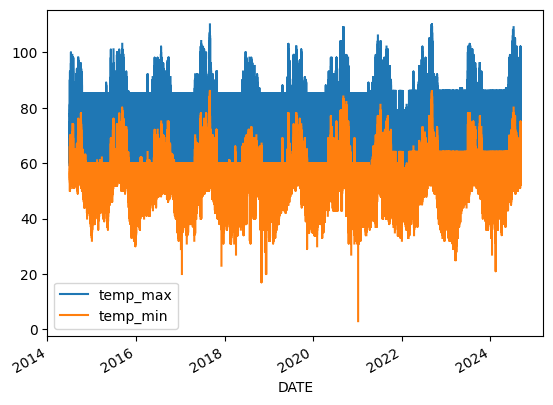

In [27]:
core_weather[["temp_max","temp_min"]].plot()

<Axes: xlabel='DATE'>

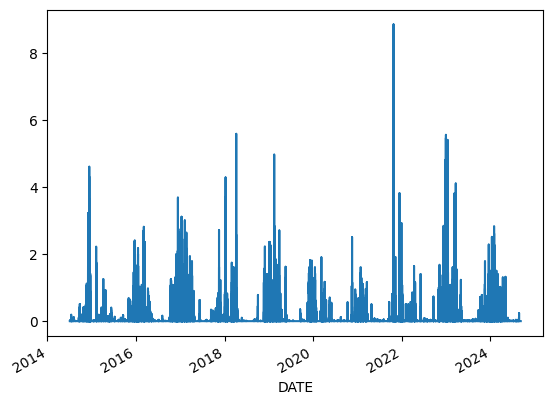

In [28]:
core_weather["precip"].plot()

In [30]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [31]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
2014-07-05,0.00,NaN,NaN,NaN
2014-07-06,0.00,NaN,NaN,NaN
2014-07-07,0.00,NaN,NaN,NaN
2014-07-08,0.00,NaN,NaN,NaN
2014-07-09,0.00,NaN,NaN,NaN
...,...,...,...,...
2024-01-24,0.47,86.0,64.0,86.0
2024-01-25,0.13,86.0,64.0,86.0
2024-02-01,1.30,86.0,64.0,86.0


In [32]:
core_weather = core_weather.iloc[:-1,:].copy()

In [33]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
2014-07-05,0.00,NaN,NaN,NaN
2014-07-06,0.00,NaN,NaN,NaN
2014-07-07,0.00,NaN,NaN,NaN
2014-07-08,0.00,NaN,NaN,NaN
2014-07-09,0.00,NaN,NaN,NaN
...,...,...,...,...
2024-01-23,0.06,86.0,64.0,86.0
2024-01-24,0.47,86.0,64.0,86.0
2024-01-25,0.13,86.0,64.0,86.0


In [36]:
core_weather = core_weather.sort_index()

In [38]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1)
predictors = ["precip","temp_max","temp_min"]
train = core_weather.loc[:"2023-07-05"]
test = core_weather.loc["2014-07-06":]


In [39]:
train

,precip,temp_max,temp_min,target
DATE,,,,
2014-07-05,0.0,NaN,NaN,NaN
2014-07-05,0.0,85.0,60.0,85.0
2014-07-05,0.0,60.0,54.0,60.0
2014-07-05,0.0,59.0,54.0,59.0
2014-07-05,0.0,89.0,66.0,93.0
...,...,...,...,...
2023-07-05,0.0,75.0,57.0,75.0
2023-07-05,0.0,59.0,54.0,59.0
2023-07-05,0.0,71.0,54.0,71.0


In [40]:
reg.fit(train[predictors],train["target"])

ValueError: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values